In [208]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/iris.data", header=None, names=["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)","Class"])
df.head()
print(df['sepal length (cm)']/df['sepal width (cm)'])

0      1.457143
1      1.633333
2      1.468750
3      1.483871
4      1.388889
         ...   
145    2.233333
146    2.520000
147    2.166667
148    1.823529
149    1.966667
Length: 150, dtype: float64


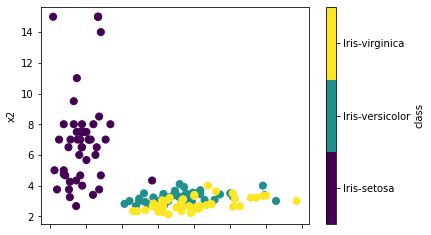

In [ ]:
df1 = pd.DataFrame({'x1':df['sepal length (cm)']/df['sepal width (cm)'],'x2':df['petal length (cm)']/df['petal width (cm)'],'class':df['Class'].astype('category')})
df1.plot.scatter(x='x1',y='x2',c='class',cmap="viridis", s=50)
plt.show()
df2 = df1.loc[:,['x1','x2']]


In [ ]:
def dist(p,q):
  d = np.linalg.norm(p - q)
  return d

In [ ]:
def kmeansp(nclusters, df, ite):
  j = random.randint(0,len(df))
  c1 = [df.loc[j,'x1'],df.loc[j,'x2']]
  c1 = np.array(c1)
  centers = []
  #print(c1)
  centers.append(c1)
  i=0
  y = np.zeros(len(df))
  #print(df.iloc[0])
  v =[ ]
  v.append(j)
  for k in range(1, nclusters):
    c2 = df.iloc[0].to_numpy()
    c2 = np.array(c2)
    #print(c2)
    min = dist(np.array(np.mean(centers,axis=0)), c2)
    for r in range(1, len(df)):
      #print(r)
      if r in v:
        continue
      if dist(np.array(np.mean(centers,axis=0)), (df.iloc[r]).to_numpy())>min:
        c2 = (df.iloc[r]).to_numpy()
        j = r
        min = dist(np.array(np.mean(centers,axis=0)), (df.iloc[r]).to_numpy())

    v.append(j)
    #print(np.array(np.mean(centers,axis=0)))
    centers.append(c2)

  #print(centers)
  for q in range(0,ite):
    for r in range(len(df)):
      
      min = dist(centers[0], (df.iloc[r]).to_numpy())
      for k in range(1,nclusters):
        if dist(centers[k], (df.iloc[r]).to_numpy())<min:
          min = dist(centers[k], (df.iloc[r]).to_numpy())
          y[r]=k
      
      
    #print(y)
    df['result'] = pd.DataFrame(y)
    for k in range(0,nclusters):
      #print((np.mean(df.loc[df['result']==k])).to_numpy())
      mint = (np.mean(df.loc[df['result']==k], axis=0)).to_numpy()
      centers[k][0] = mint[0]
      centers[k][1] = mint[1]

    df.drop(['result'],axis=1,inplace=True)
  
  return (y, centers)

In [ ]:

#df2.drop('result',axis=1,inplace=True)
print(df2)
y, centers = kmeansp(4, df2, 50)
print(y)

           x1        x2
0    1.457143  7.000000
1    1.633333  7.000000
2    1.468750  6.500000
3    1.483871  7.500000
4    1.388889  7.000000
..        ...       ...
145  2.233333  2.260870
146  2.520000  2.631579
147  2.166667  2.600000
148  1.823529  2.347826
149  1.966667  2.833333

[150 rows x 2 columns]
[0. 0. 0. 1. 0. 2. 0. 1. 0. 3. 1. 1. 3. 1. 0. 2. 2. 0. 0. 0. 1. 2. 0. 2.
 1. 1. 2. 1. 0. 1. 1. 2. 3. 0. 3. 0. 0. 3. 0. 1. 2. 2. 0. 2. 0. 0. 1. 0.
 1. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]


In [ ]:
kmean = KMeans(n_clusters=3,init='k-means++',random_state=0)
y = kmean.fit_predict(df2)
print(df2)
print(y)

           x1        x2
0    1.457143  7.000000
1    1.633333  7.000000
2    1.468750  6.500000
3    1.483871  7.500000
4    1.388889  7.000000
..        ...       ...
145  2.233333  2.260870
146  2.520000  2.631579
147  2.166667  2.600000
148  1.823529  2.347826
149  1.966667  2.833333

[150 rows x 2 columns]
[1 1 1 1 1 2 2 1 1 0 1 1 0 0 1 2 2 2 1 2 1 2 2 2 1 1 2 1 1 1 1 2 0 1 0 1 1
 0 1 1 2 2 1 2 2 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


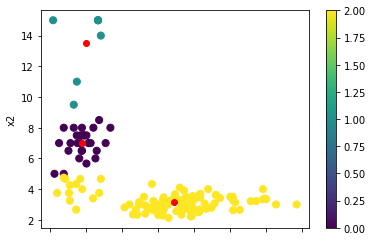

In [ ]:
df2.plot.scatter(x='x1',y='x2',c=y,cmap="viridis", s=50)
plt.plot(centers[0][0],centers[0][1],'ro')
plt.plot(centers[1][0],centers[1][1],'ro')
plt.plot(centers[2][0],centers[2][1],'ro')

In [ ]:
def objec(X, y, k):
  df = X
  obj=[]
  df['result'] = y.tolist()
  for i in range(0,k):
    m1 = np.mean(df.loc[df['result']==i,'x1'])
    m2 = np.mean(df.loc[df['result']==i,'x2'])
    obj.append(((df.loc[df['result']==i,'x1']-m1)**2+(m2-df.loc[df['result']==i,'x2'])**2).sum())
  df.drop('result',axis=1,inplace=True)
  #X.drop('result',axis=1)
  return np.mean(obj)

In [ ]:
y, centers = kmeansp(6, df2, 1)
print(y)
obj = objec(df2, np.asarray(y), 3)
print(df2)
print(obj)
objective = []
avg=[]
obj=[]
for i in range(1, 49):

    y, centers = kmeansp(1, df2, i)
    obj.append(objec(df2, np.asarray(y), k))

avg.append(np.mean(obj))

  
    #print(obj)
#for k in range(1,6):
  #avg=[]
  #for i in range(1,50):
    
    #y, centres = kmeansp(k, df2, i)
    #avg.append(objec(df2, np.asarray(y), k))
  #objective.append(np.mean(avg))

[0. 0. 0. 0. 0. 4. 0. 0. 0. 3. 0. 0. 3. 0. 0. 4. 2. 0. 0. 0. 0. 4. 0. 4.
 0. 0. 4. 0. 0. 0. 0. 4. 1. 0. 3. 0. 0. 3. 0. 0. 4. 4. 0. 2. 0. 0. 0. 0.
 0. 0. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 2. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 2. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 2. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 2. 2. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 2. 4. 4. 4. 4. 4. 4. 4.
 2. 4. 4. 4. 2. 4.]
           x1        x2
0    1.457143  7.000000
1    1.633333  7.000000
2    1.468750  6.500000
3    1.483871  7.500000
4    1.388889  7.000000
..        ...       ...
145  2.233333  2.260870
146  2.520000  2.631579
147  2.166667  2.600000
148  1.823529  2.347826
149  1.966667  2.833333

[150 rows x 2 columns]
22.25353323271688


In [ ]:

obj=[]
for i in range(1, 49):

    y, centers = kmeansp(2, df2, i)
    obj.append(objec(df2, np.asarray(y), k))

avg.append(np.mean(obj))

In [ ]:
obj=[]
for i in range(1, 49):

    y, centers = kmeansp(3, df2, i)
    obj.append(objec(df2, np.asarray(y), k))

avg.append(np.mean(obj))

In [ ]:
obj=[]
for i in range(1, 49):

    y, centers = kmeansp(5, df2, i)
    obj.append(objec(df2, np.asarray(y), k))

avg.append(np.mean(obj))

In [ ]:
obj=[]
for i in range(1, 48):

    y, centers = kmeansp(4, df2, i)
    obj.append(objec(df2, np.asarray(y), k))

avg.append(np.mean(obj))

In [ ]:
y, centers = kmeansp(4, df2, 49)
obj.append(objec(df2, np.asarray(y), k))
avg[4] = np.mean(obj)
print(avg)

[1071.2286861568834, 421.4320610310495, 34.343314954367926, 18.130100864385177, 19.328216175883714]


Text(0, 0.5, 'Clustering Objective')

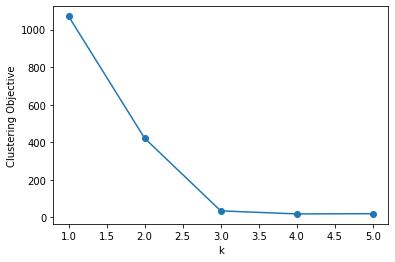

In [ ]:
plt.plot([x for x in range(1,6)],avg, '-o')
plt.xlabel("k")
plt.ylabel("Clustering Objective")

Note that here we have taken the distance measure as the clustering objective. As we need a comparitive study to determine the best k, means work as all we need is comparision. But while plottimg the accuracy vs no. of iterations curve below, we take the exact clustering objective. 

According to this, k=3 can be taken following the elbow method. The elbow method involves selecting the value of k that maximizes explained variance while minimizing K; that is, the value of k at the crook of the elbow. The technical sense underlying this is that a minimal gain in explained variance at greater values of k is offset by the increasing risk of overfitting. As k=3, the graph corresponing to that has already been shown above. 

In [ ]:
obj=[]
y, centers = kmeansp(3, df2, 50)
print(centers)
y, centers = kmeansp(3, df2, 40)
print(centers)
def objec(X, y, k, centers):
  df = X
  obj=[]
  df['result'] = y.tolist()
  for i in range(0,k):
    m1 = centers[k][0]
    m2 = centers[k][1]
    obj.append(((df.loc[df['result']==i,'x1']-m1)**2+(m2-df.loc[df['result']==i,'x2'])**2).sum())
  df.drop('result',axis=1,inplace=True)
  #X.drop('result',axis=1)
  return np.mean(obj)

obj=[]
for i in range(1, 100):

    y, centers = kmeansp(3, df2, i)
    obj.append(objec(df2, np.asarray(y), k,  centers))

[array([1.47104815, 7.00574713]), array([ 1.49361803, 13.5       ]), array([2.10663107, 3.1351605 ])]
[array([1.47104815, 7.00574713]), array([ 1.49361803, 13.5       ]), array([2.10663107, 3.1351605 ])]


Text(0, 0.5, 'Clustering Objective')

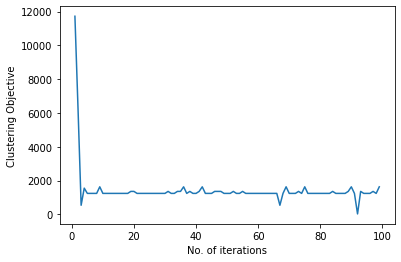

In [ ]:
plt.plot([x for x in range(1,100)], obj)
plt.xlabel('No. of iterations')
plt.ylabel('Clustering Objective')

As we see that with an increase in the no. of iterations, the clustering objective which we have choosen more or less reaches steady state. The spikes are probably due to the computaion limit of the program. 